In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [ ]:
import torch

# Set seed for reproducibility
torch.manual_seed(45)

# Convert data to tensors
x = torch.tensor(x1, dtype=torch.float32).reshape(-1, 1)
y_true = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Initialize parameters theta_0 and theta_1
theta_0 = torch.tensor(0.0, requires_grad=True)
theta_1 = torch.tensor(0.0, requires_grad=True)

# Define linear regression model
def linear_model(x, theta_0, theta_1):
    return theta_1 * x + theta_0

# Define mean squared error loss function
def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

# True gradient using autograd
y_pred = linear_model(x, theta_0, theta_1)
loss = mse_loss(y_pred, y_true)

# Compute gradients
loss.backward()

# True gradients
true_gradient_theta_0 = theta_0.grad.item()
true_gradient_theta_1 = theta_1.grad.item()

print(f"True gradient for theta_0: {true_gradient_theta_0}")
print(f"True gradient for theta_1: {true_gradient_theta_1}")

# Now let's calculate the stochastic gradient for each point and average them

stochastic_gradients_theta_0 = []
stochastic_gradients_theta_1 = []

# Reset gradients
theta_0.grad.zero_()
theta_1.grad.zero_()

# Calculate stochastic gradients
for i in range(num_samples):
    # For each point, calculate the prediction and loss
    y_pred_i = linear_model(x[i], theta_0, theta_1)
    loss_i = mse_loss(y_pred_i, y_true[i])

    # Zero gradients before backpropagation
    theta_0.grad = None
    theta_1.grad = None

    # Compute the gradients for this point
    loss_i.backward()

    # Store the stochastic gradients
    stochastic_gradients_theta_0.append(theta_0.grad.item())
    stochastic_gradients_theta_1.append(theta_1.grad.item())

# Average stochastic gradients
avg_stochastic_gradient_theta_0 = sum(stochastic_gradients_theta_0) / num_samples
avg_stochastic_gradient_theta_1 = sum(stochastic_gradients_theta_1) / num_samples

print(f"Average stochastic gradient for theta_0: {avg_stochastic_gradient_theta_0}")
print(f"Average stochastic gradient for theta_1: {avg_stochastic_gradient_theta_1}")

# Compare the average stochastic gradient to the true gradient
print("\nComparison:")
print(f"True gradient for theta_0 vs. Average stochastic gradient: {true_gradient_theta_0} vs. {avg_stochastic_gradient_theta_0}")
print(f"True gradient for theta_1 vs. Average stochastic gradient: {true_gradient_theta_1} vs. {avg_stochastic_gradient_theta_1}")

True gradient for theta_0: -7.447054386138916
True gradient for theta_1: -1.0253016948699951
Average stochastic gradient for theta_0: -7.4470539569854735
Average stochastic gradient for theta_1: -1.0253017988055944

Comparison:
True gradient for theta_0 vs. Average stochastic gradient: -7.447054386138916 vs. -7.4470539569854735
True gradient for theta_1 vs. Average stochastic gradient: -1.0253016948699951 vs. -1.0253017988055944


## 3.

Average epochs to reach epsilon-neighborhood (Full-batch GD): 653.0
Average epochs to reach epsilon-neighborhood (Mini-batch GD): 131.0
Average epochs to reach epsilon-neighborhood (Stochastic GD): 19.0
Average iterations to reach epsilon-neighborhood (Full-batch GD): 653.0
Average iterations to reach epsilon-neighborhood (Mini-batch GD): 655.0
Average iterations to reach epsilon-neighborhood (Stochastic GD): 760.0


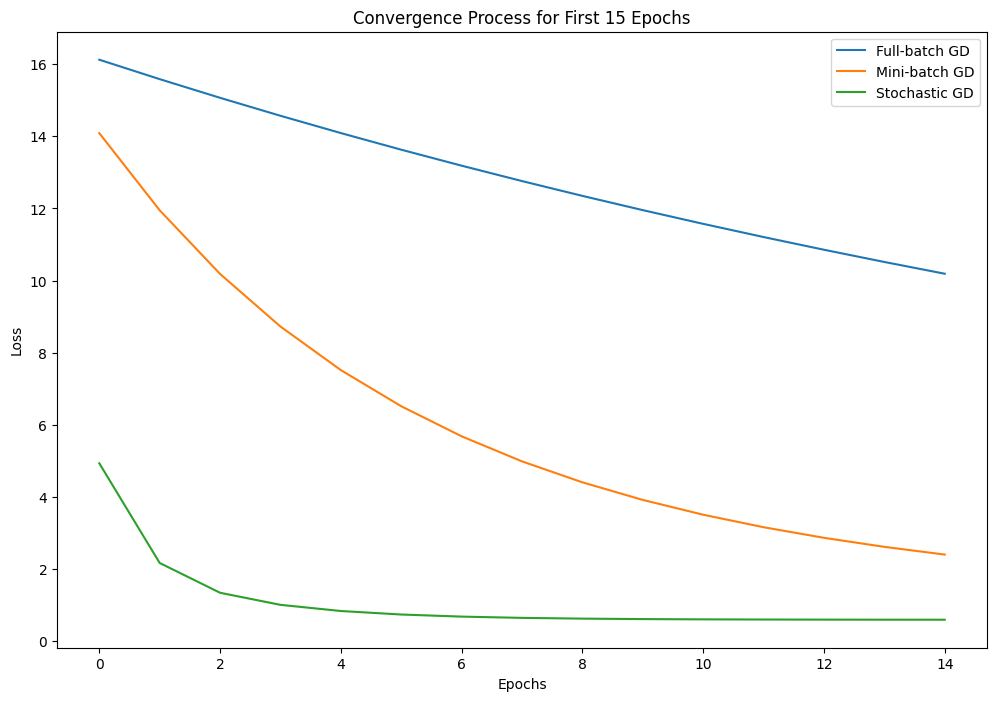

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(45)

# Generate data
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Add bias term to x
X = np.column_stack((np.ones(num_samples), x1))

# Define the loss function (MSE)
def loss(X, y, w):
    return np.mean((X.dot(w) - y)**2)

# Define the gradient of the loss function
def gradient(X, y, w):
    return 2 * X.T.dot(X.dot(w) - y) / len(y)

# Full-batch gradient descent
def full_batch_gd(X, y, learning_rate, epochs):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        grad = gradient(X, y, w)
        w -= learning_rate * grad
        losses.append(loss(X, y, w))
    return w, losses

# Mini-batch gradient descent
def mini_batch_gd(X, y, learning_rate, epochs, batch_size):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        for i in range(0, len(y), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            grad = gradient(X_batch, y_batch, w)
            w -= learning_rate * grad
        losses.append(loss(X, y, w))
    return w, losses

# Stochastic gradient descent
def sgd(X, y, learning_rate, epochs):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        for i in range(len(y)):
            grad = gradient(X[i:i+1], y[i:i+1], w)
            w -= learning_rate * grad
        losses.append(loss(X, y, w))
    return w, losses

# Calculate when each method reaches the epsilon neighborhood of the minimum loss
def epochs_to_optimal(losses, min_loss, epsilon):
    for epoch, loss_value in enumerate(losses):
        if abs(loss_value - min_loss) < epsilon:
            return epoch + 1  # Return the number of epochs at which it gets sufficiently close
    return len(losses)  # Return total epochs if not sufficiently close

# Main function to run experiments and calculate average epochs and iterations
def avg_iterations_to_optimum(X, y, learning_rate, epochs, batch_size, epsilon, trials=10):
    full_batch_epochs = []
    mini_batch_epochs = []
    sgd_epochs = []

    for _ in range(trials):
        # Run all methods
        _, full_batch_losses = full_batch_gd(X, y, learning_rate, epochs)
        _, mini_batch_losses = mini_batch_gd(X, y, learning_rate, epochs, batch_size)
        _, sgd_losses = sgd(X, y, learning_rate, epochs)

        # Get the minimum loss across all methods
        min_loss = min(min(full_batch_losses), min(mini_batch_losses), min(sgd_losses))

        # Find how many epochs are needed to get within epsilon of the minimum loss
        full_batch_epochs.append(epochs_to_optimal(full_batch_losses, min_loss, epsilon))
        mini_batch_epochs.append(epochs_to_optimal(mini_batch_losses, min_loss, epsilon))
        sgd_epochs.append(epochs_to_optimal(sgd_losses, min_loss, epsilon))

    # Calculate the average epochs
    avg_full_batch_epochs = np.mean(full_batch_epochs)
    avg_mini_batch_epochs = np.mean(mini_batch_epochs)
    avg_sgd_epochs = np.mean(sgd_epochs)

    # Convert epochs to iterations using the formulas provided
    num_samples = len(y)

    avg_full_batch_iters = avg_full_batch_epochs  # 1 iteration per epoch
    avg_mini_batch_iters = (num_samples / batch_size) * avg_mini_batch_epochs
    avg_sgd_iters = num_samples * avg_sgd_epochs

    return avg_full_batch_epochs, avg_mini_batch_epochs, avg_sgd_epochs, avg_full_batch_iters, avg_mini_batch_iters, avg_sgd_iters

# Set hyperparameters
learning_rate = 0.01
epochs = 1000  # Run for a large number of epochs
epsilon = 0.001  # Epsilon for sufficiently close
batch_size = 8
trials = 100  # Number of trials for averaging

# Calculate the average epochs and iterations
avg_full_batch_epochs, avg_mini_batch_epochs, avg_sgd_epochs, avg_full_batch_iters, avg_mini_batch_iters, avg_sgd_iters = avg_iterations_to_optimum(X, y, learning_rate, epochs, batch_size, epsilon, trials)

# Display the average number of epochs and iterations for each method
print(f"Average epochs to reach epsilon-neighborhood (Full-batch GD): {avg_full_batch_epochs}")
print(f"Average epochs to reach epsilon-neighborhood (Mini-batch GD): {avg_mini_batch_epochs}")
print(f"Average epochs to reach epsilon-neighborhood (Stochastic GD): {avg_sgd_epochs}")

print(f"Average iterations to reach epsilon-neighborhood (Full-batch GD): {avg_full_batch_iters}")
print(f"Average iterations to reach epsilon-neighborhood (Mini-batch GD): {avg_mini_batch_iters}")
print(f"Average iterations to reach epsilon-neighborhood (Stochastic GD): {avg_sgd_iters}")

# Visualize the convergence process for the first 15 epochs
_, full_batch_losses = full_batch_gd(X, y, learning_rate, epochs)
_, mini_batch_losses = mini_batch_gd(X, y, learning_rate, epochs, batch_size)
_, sgd_losses = sgd(X, y, learning_rate, epochs)

plt.figure(figsize=(12, 8))
plt.plot(full_batch_losses[:15], label='Full-batch GD')
plt.plot(mini_batch_losses[:15], label='Mini-batch GD')
plt.plot(sgd_losses[:15], label='Stochastic GD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence Process for First 15 Epochs')
plt.legend()
plt.show()


The **Full-batch Gradient Descent (GD)** takes the largest number of epochs to converge (653 epochs), followed by Mini-batch GD (131 epochs), and finally, Stochastic GD (19 epochs).

### Key Insights:
1. **Full-batch GD**: This method updates the model parameters after computing the gradient of the entire dataset in each epoch. Since the gradients are calculated over the entire dataset, each epoch is computationally expensive, but the model progresses smoothly towards the minimum. This explains the high number of epochs required (653 epochs), though it has the same number of iterations (653 iterations).
   
2. **Mini-batch GD**: Mini-batch updates occur after calculating the gradient over smaller batches of data. This leads to noisier updates than Full-batch GD but still faster convergence in terms of epochs (131 epochs), though the number of iterations is similar to Full-batch (655 iterations).

3. **Stochastic GD (SGD)**: This method updates the model parameters after computing the gradient for each data point, leading to more frequent updates (one update per data point). This results in much faster convergence in terms of epochs (19 epochs) but requires more iterations (760 iterations). This frequent updating introduces noise in the optimization but allows for faster progress per epoch.

### Why Full-batch GD Takes Longer:
- **Full-batch GD** generally requires more epochs because it waits until the entire dataset has been processed before updating the model. As a result, while each update is precise, it takes longer for the algorithm to reach the epsilon-neighborhood in terms of epochs. Stochastic GD, with its frequent updates, can converge more quickly in terms of epochs despite requiring more iterations due to the frequent noise in updates.

Thus, Full-batch GD takes the largest number of epochs due to the slower, smoother updates per iteration.

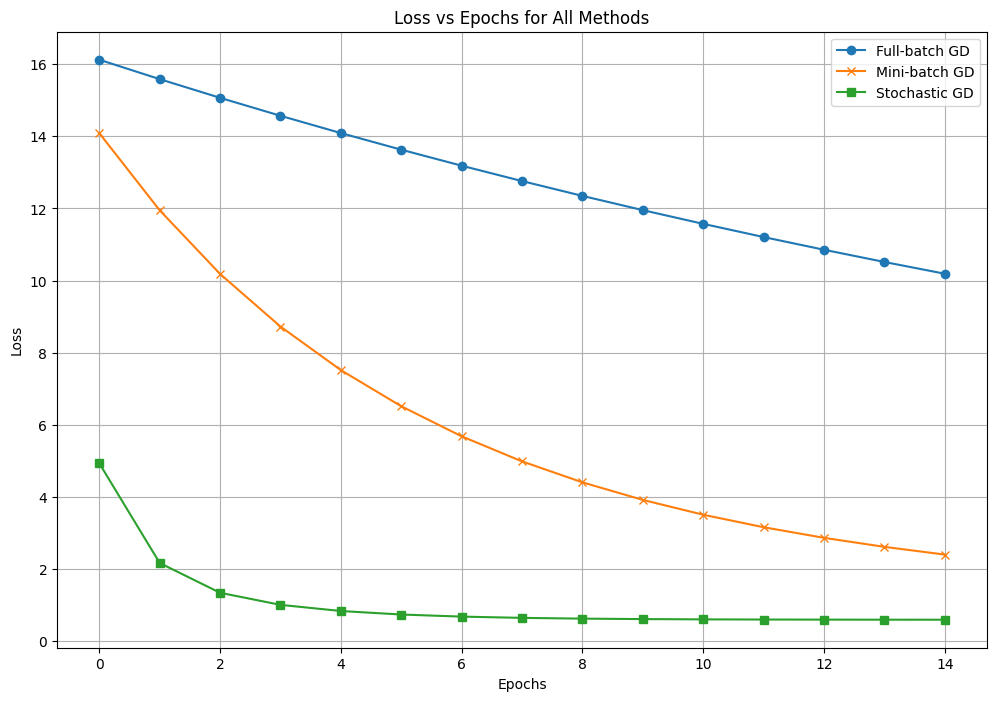

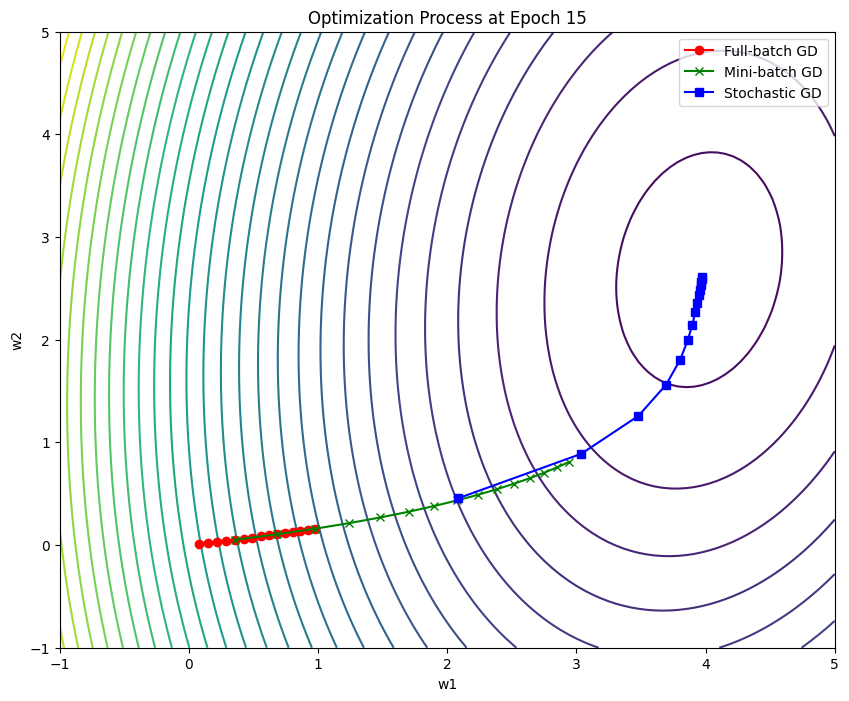

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set random seed for reproducibility
np.random.seed(45)

# Generate data
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Add bias term to x
X = np.column_stack((np.ones(num_samples), x1))

# Define the loss function (MSE)
def loss(X, y, w):
    return np.mean((X.dot(w) - y)**2)

# Define the gradient of the loss function
def gradient(X, y, w):
    return 2 * X.T.dot(X.dot(w) - y) / len(y)

# Full-batch gradient descent
def full_batch_gd(X, y, learning_rate, epochs):
    w = np.zeros(X.shape[1])
    losses = []
    weights_path = []
    for _ in range(epochs):
        grad = gradient(X, y, w)
        w -= learning_rate * grad
        losses.append(loss(X, y, w))
        weights_path.append(w.copy())
    return w, losses, weights_path

# Mini-batch gradient descent
def mini_batch_gd(X, y, learning_rate, epochs, batch_size):
    w = np.zeros(X.shape[1])
    losses = []
    weights_path = []
    for _ in range(epochs):
        for i in range(0, len(y), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            grad = gradient(X_batch, y_batch, w)
            w -= learning_rate * grad
        losses.append(loss(X, y, w))
        weights_path.append(w.copy())
    return w, losses, weights_path

# Stochastic gradient descent
def sgd(X, y, learning_rate, epochs):
    w = np.zeros(X.shape[1])
    losses = []
    weights_path = []
    for _ in range(epochs):
        for i in range(len(y)):
            grad = gradient(X[i:i+1], y[i:i+1], w)
            w -= learning_rate * grad
        losses.append(loss(X, y, w))
        weights_path.append(w.copy())
    return w, losses, weights_path

# Set hyperparameters
learning_rate = 0.01
epochs = 15  # Visualizing the first 15 epochs
epsilon = 0.001
batch_size = 8

# Run all methods
full_batch_w, full_batch_losses, full_batch_path = full_batch_gd(X, y, learning_rate, epochs)
mini_batch_w, mini_batch_losses, mini_batch_path = mini_batch_gd(X, y, learning_rate, epochs, batch_size)
sgd_w, sgd_losses, sgd_path = sgd(X, y, learning_rate, epochs)

# Plot Loss vs Epochs for all methods
plt.figure(figsize=(12, 8))
plt.plot(full_batch_losses, label='Full-batch GD', marker='o')
plt.plot(mini_batch_losses, label='Mini-batch GD', marker='x')
plt.plot(sgd_losses, label='Stochastic GD', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for All Methods')
plt.legend()
plt.grid(True)
plt.show()

# Create contour plots of the loss function
w1 = np.linspace(-1, 5, 100)
w2 = np.linspace(-1, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i, j] = loss(X, y, np.array([W1[i, j], W2[i, j]]))

# Visualizing the paths of the optimization processes
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(W1, W2, Z, levels=30)
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_title('Contour Plot with Optimization Paths')

# Paths from the optimization processes
def animate(i):
    ax.clear()
    ax.contour(W1, W2, Z, levels=30)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_title(f'Optimization Process at Epoch {i+1}')

    # Plot paths for all methods up to epoch i
    if i < len(full_batch_path):
        full_batch_coords = np.array(full_batch_path[:i+1])
        ax.plot(full_batch_coords[:, 0], full_batch_coords[:, 1], 'r-', label='Full-batch GD', marker='o')

    if i < len(mini_batch_path):
        mini_batch_coords = np.array(mini_batch_path[:i+1])
        ax.plot(mini_batch_coords[:, 0], mini_batch_coords[:, 1], 'g-', label='Mini-batch GD', marker='x')

    if i < len(sgd_path):
        sgd_coords = np.array(sgd_path[:i+1])
        ax.plot(sgd_coords[:, 0], sgd_coords[:, 1], 'b-', label='Stochastic GD', marker='s')

    ax.legend()

# Create animation for 15 epochs
anim = FuncAnimation(fig, animate, frames=15, interval=500, repeat=False)

# Save animation as a gif (for example)
anim.save('optimization_process.gif', writer='pillow', fps=2)

# Show the animation in a notebook or visualize it in an external viewer
plt.show()


## 4.

In [36]:
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [ ]:
#grad descent with momentum

import numpy as np
import matplotlib.pyplot as plt

# Mean Squared Error loss
def mse_loss(theta, X, y):
    m = len(y)
    predictions = X @ theta
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient for linear regression
def gradient(theta, X, y):
    m = len(y)
    predictions = X @ theta
    error = predictions - y
    grad = (1 / m) * (X.T @ error)
    return grad

# Gradient Descent with Momentum
def gradient_descent_momentum(X, y, theta, alpha, beta, n_iter):
    m = len(y)
    v = np.zeros_like(theta)
    history = []
    for i in range(n_iter):
        grad = gradient(theta, X, y)
        v = beta * v + alpha * grad
        theta = theta - v
        loss = mse_loss(theta, X, y)
        history.append((theta.copy(), grad.copy(), v.copy(), loss))
        if np.linalg.norm(grad) < 0.001:
            break
    return theta, history

# Prepare the data (add intercept)
X = np.c_[np.ones(num_samples), x1]
theta_init = np.zeros(X.shape[1])
alpha = 0.1
beta = 0.9
n_iter = 15

theta_momentum, history_momentum = gradient_descent_momentum(X, y, theta_init, alpha, beta, n_iter)


In [ ]:
# Vanilla Gradient Descent without momentum
def gradient_descent(X, y, theta, alpha, n_iter):
    m = len(y)
    history = []
    for i in range(n_iter):
        grad = gradient(theta, X, y)
        theta = theta - alpha * grad
        loss = mse_loss(theta, X, y)
        history.append((theta.copy(), grad.copy(), loss))
        if np.linalg.norm(grad) < 0.001:
            break
    return theta, history

theta_vanilla, history_vanilla = gradient_descent(X, y, theta_init, alpha, n_iter)


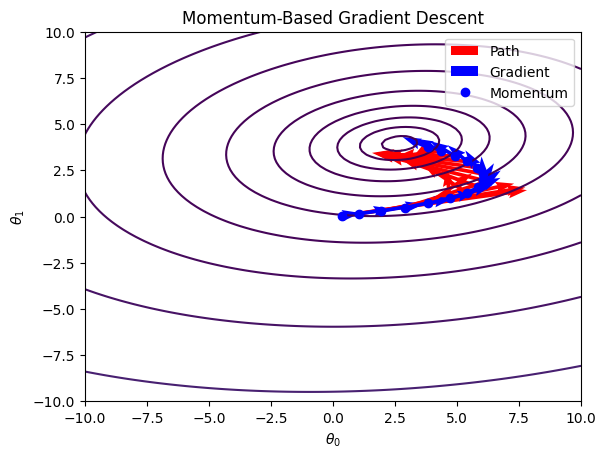

In [ ]:
# Contour plot for momentum visualization
def plot_convergence(X, y, history, title):
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-10, 10, 100)
    Z = np.zeros((len(theta0_vals), len(theta1_vals)))

    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.array([theta0_vals[i], theta1_vals[j]])
            Z[i,j] = mse_loss(t, X, y)

    # Create the contour plot
    plt.contour(theta0_vals, theta1_vals, Z, levels=np.logspace(-2, 3, 20))
    for i, (theta, grad, v, loss) in enumerate(history):
        plt.quiver(theta[0], theta[1], -grad[0], -grad[1], color='r', scale=10, label='Gradient')
        plt.quiver(theta[0], theta[1], -v[0], -v[1], color='b', scale=10, label='Momentum' if i == 0 else "")
        plt.plot(theta[0], theta[1], 'bo')
    plt.title(title)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.legend(['Path', 'Gradient', 'Momentum'])
    plt.show()

# Plot the momentum-based convergence
plot_convergence(X, y, history_momentum, 'Momentum-Based Gradient Descent')


Step 1: w = -0.0953, b = 1.6886, loss = 9.5645
Step 2: w = 0.1654, b = 2.5474, loss = 7.0857
Step 3: w = 0.5353, b = 3.5583, loss = 3.9678
Step 4: w = 0.9972, b = 4.5103, loss = 2.0632
Step 5: w = 1.5288, b = 5.2266, loss = 1.9657
Step 6: w = 2.1017, b = 5.5966, loss = 2.8934
Step 7: w = 2.6819, b = 5.5905, loss = 3.5731
Step 8: w = 3.2319, b = 5.2571, loss = 3.2849
Step 9: w = 3.7144, b = 4.7051, loss = 2.2762
Step 10: w = 4.0961, b = 4.0748, loss = 1.3693
Step 11: w = 4.3525, b = 3.5067, loss = 1.2126
Step 12: w = 4.4703, b = 3.1125, loss = 1.7994
Step 13: w = 4.4491, b = 2.9557, loss = 2.5616
Step 14: w = 4.3016, b = 3.0434, loss = 2.8694
Step 15: w = 4.0512, b = 3.3313, loss = 2.4958


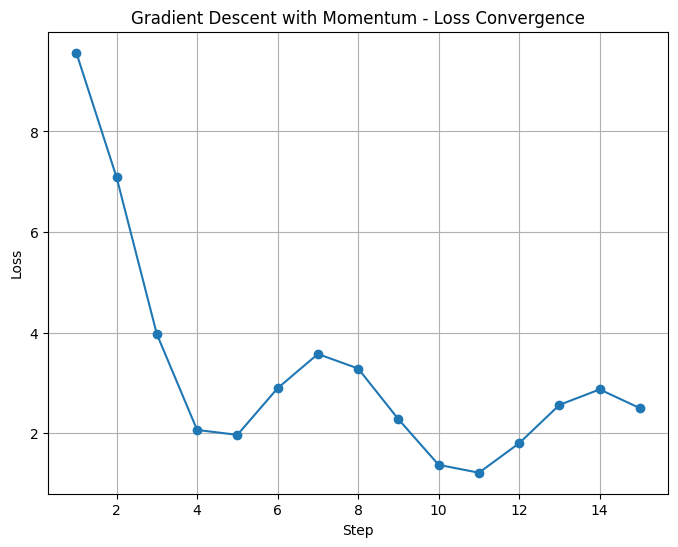

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent with Momentum function
def gradient_descent_momentum(x, y, lr=0.1, momentum=0.9, num_steps=15):
    # Initialize parameters
    w = np.random.randn()  # weight
    b = np.random.randn()  # bias
    v_w, v_b = 0, 0  # velocity for momentum

    losses = []  # To store loss values for visualization

    for step in range(num_steps):
        # Predict output
        y_pred = w * x + b

        # Compute the mean squared error loss
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

        # Compute gradients
        grad_w = np.mean(2 * (y_pred - y) * x)
        grad_b = np.mean(2 * (y_pred - y))

        # Update velocity for w and b using momentum
        v_w = momentum * v_w - lr * grad_w
        v_b = momentum * v_b - lr * grad_b

        # Update the parameters
        w += v_w
        b += v_b

        # Print for debugging the steps and parameters
        print(f"Step {step+1}: w = {w:.4f}, b = {b:.4f}, loss = {loss:.4f}")

    return losses

# Run gradient descent with momentum and visualize the process
losses = gradient_descent_momentum(x1, y)

# Plot the convergence process
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Gradient Descent with Momentum - Loss Convergence')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Define the loss and gradient calculation
def compute_loss(x, y, w, b):
    y_pred = w * x + b
    return np.mean((y_pred - y) ** 2)

def compute_gradients(x, y, w, b):
    y_pred = w * x + b
    grad_w = np.mean(2 * (y_pred - y) * x)
    grad_b = np.mean(2 * (y_pred - y))
    return grad_w, grad_b

# Vanilla Gradient Descent
def vanilla_gradient_descent(x, y, lr=0.1, num_steps=1000, epsilon=0.001):
    w, b = np.random.randn(), np.random.randn()
    for step in range(num_steps):
        grad_w, grad_b = compute_gradients(x, y, w, b)
        w -= lr * grad_w
        b -= lr * grad_b
        loss = compute_loss(x, y, w, b)
        if loss < epsilon:
            return step + 1
    return num_steps

# Gradient Descent with Momentum
def gradient_descent_momentum(x, y, lr=0.1, momentum=0.9, num_steps=1000, epsilon=0.001):
    w, b = np.random.randn(), np.random.randn()
    v_w, v_b = 0, 0
    for step in range(num_steps):
        grad_w, grad_b = compute_gradients(x, y, w, b)
        v_w = momentum * v_w - lr * grad_w
        v_b = momentum * v_b - lr * grad_b
        w += v_w
        b += v_b
        loss = compute_loss(x, y, w, b)
        if loss < epsilon:
            return step + 1
    return num_steps

# Stochastic Gradient Descent with Momentum
def sgd_momentum(x, y, lr=0.01, momentum=0.9, num_steps=1000, epsilon=0.001):
    w, b = np.random.randn(), np.random.randn()
    v_w, v_b = 0, 0
    for step in range(num_steps):
        idx = np.random.randint(0, len(x))
        grad_w, grad_b = 2 * (w * x[idx] + b - y[idx]) * x[idx], 2 * (w * x[idx] + b - y[idx])
        v_w = momentum * v_w - lr * grad_w
        v_b = momentum * v_b - lr * grad_b
        w += v_w
        b += v_b
        loss = compute_loss(x, y, w, b)
        if loss < epsilon:
            return step + 1
    return num_steps

# Running multiple trials to average the steps
def compare_algorithms(x, y, trials=50, epsilon=0.001):
    vanilla_steps = []
    momentum_steps = []
    sgd_momentum_steps = []

    for _ in range(trials):
        vanilla_steps.append(vanilla_gradient_descent(x, y, epsilon=epsilon))
        momentum_steps.append(gradient_descent_momentum(x, y, epsilon=epsilon))
        sgd_momentum_steps.append(sgd_momentum(x, y, epsilon=epsilon))

    avg_vanilla = np.mean(vanilla_steps)
    avg_momentum = np.mean(momentum_steps)
    avg_sgd_momentum = np.mean(sgd_momentum_steps)

    return avg_vanilla, avg_momentum, avg_sgd_momentum

# Running the comparison for the dataset
avg_vanilla, avg_momentum, avg_sgd_momentum = compare_algorithms(x1, y)

print(f"Average steps to converge (ϵ = 0.001):")
print(f"Vanilla Gradient Descent: {avg_vanilla:.2f} steps")
print(f"Full-batch Gradient Descent with Momentum: {avg_momentum:.2f} steps")
print(f"Stochastic Gradient Descent with Momentum: {avg_sgd_momentum:.2f} steps")


Average steps to converge (ϵ = 0.001):
Vanilla Gradient Descent: 1000.00 steps
Full-batch Gradient Descent with Momentum: 1000.00 steps
Stochastic Gradient Descent with Momentum: 1000.00 steps


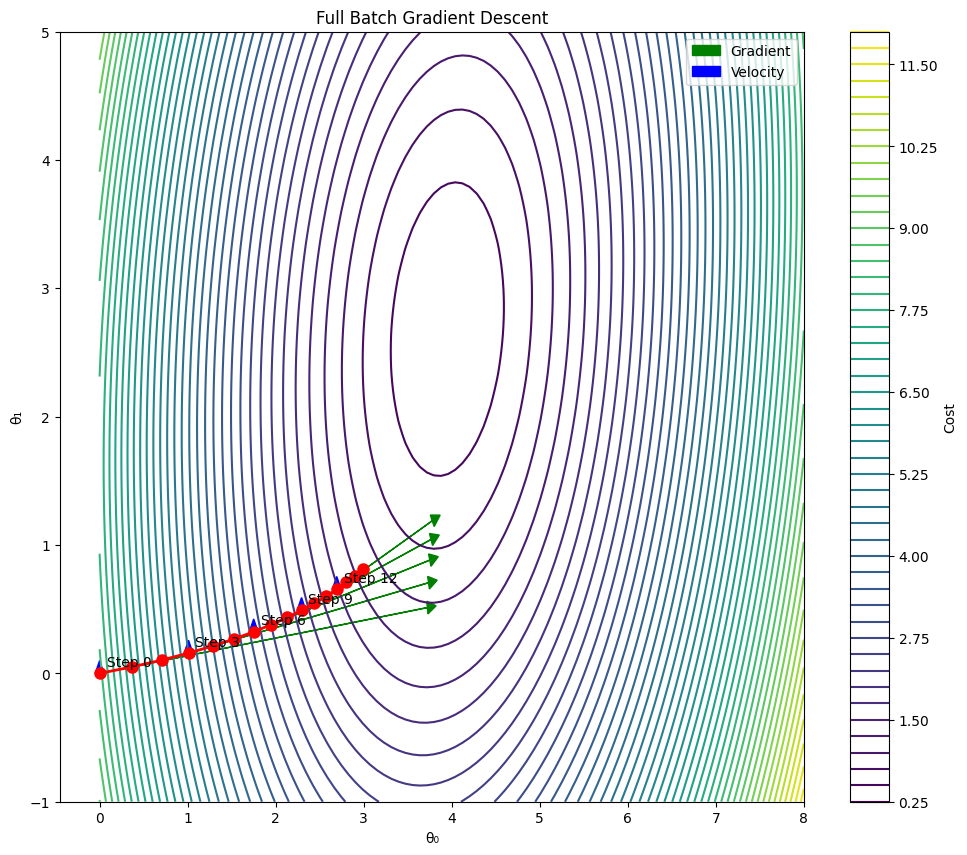

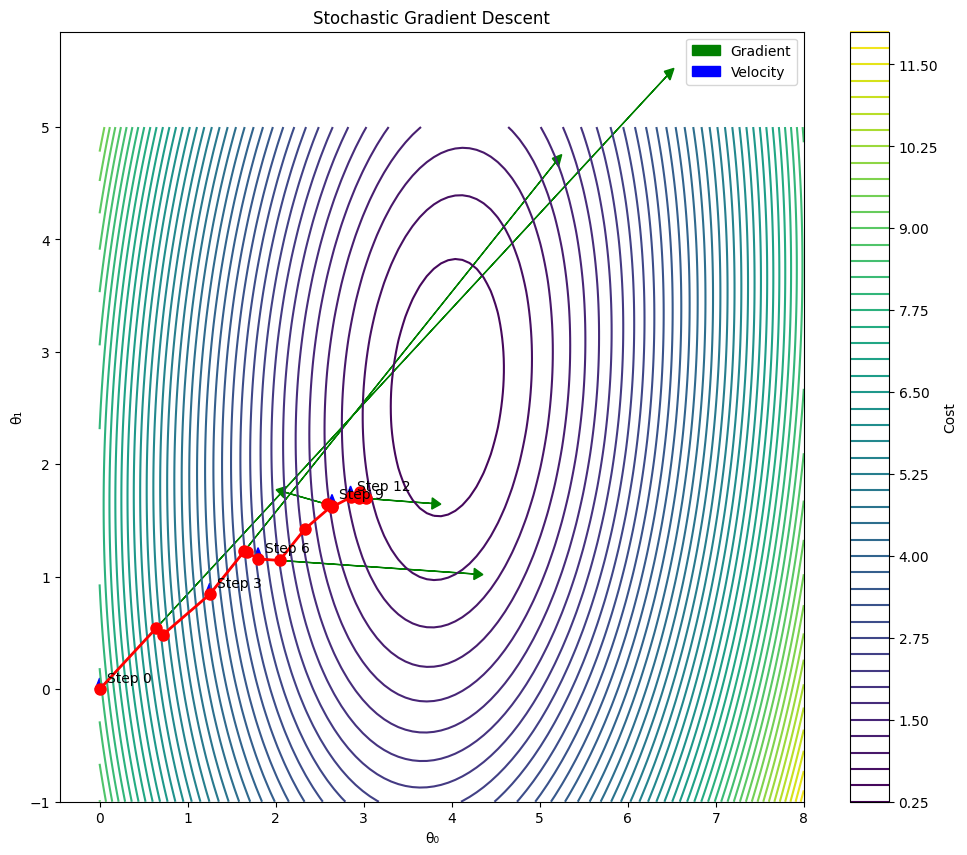

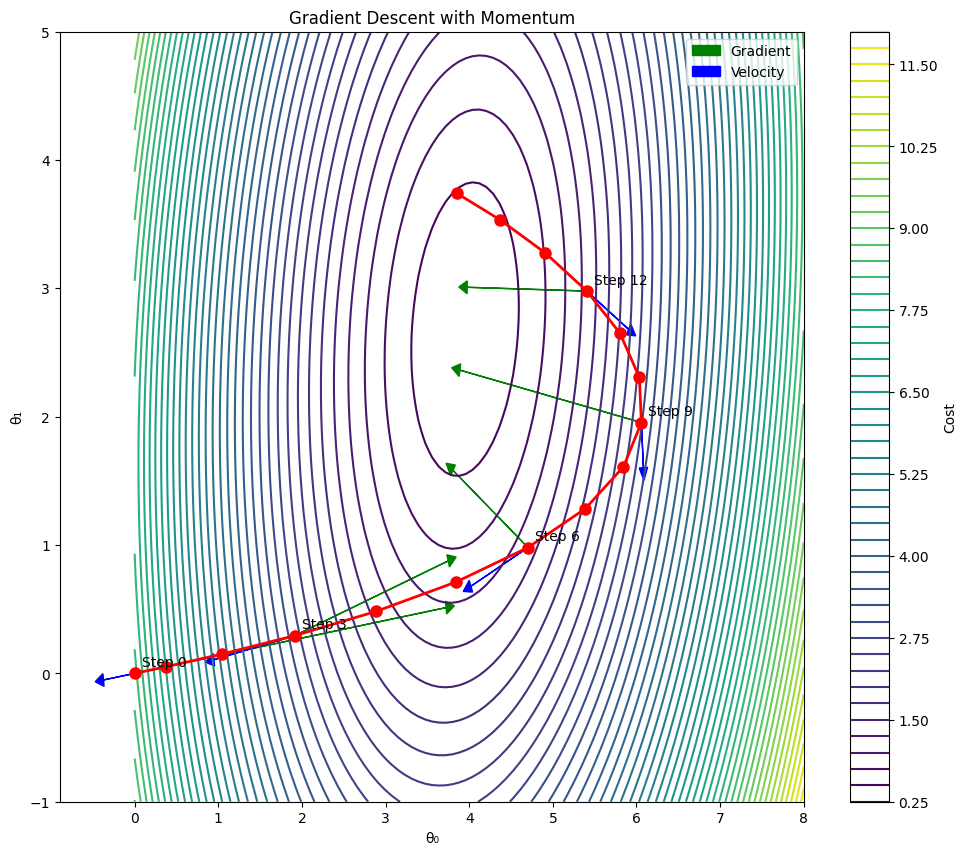

Steps to convergence (ε = 0.001):
Full Batch GD: 15
Stochastic GD: 15
Momentum GD: 15


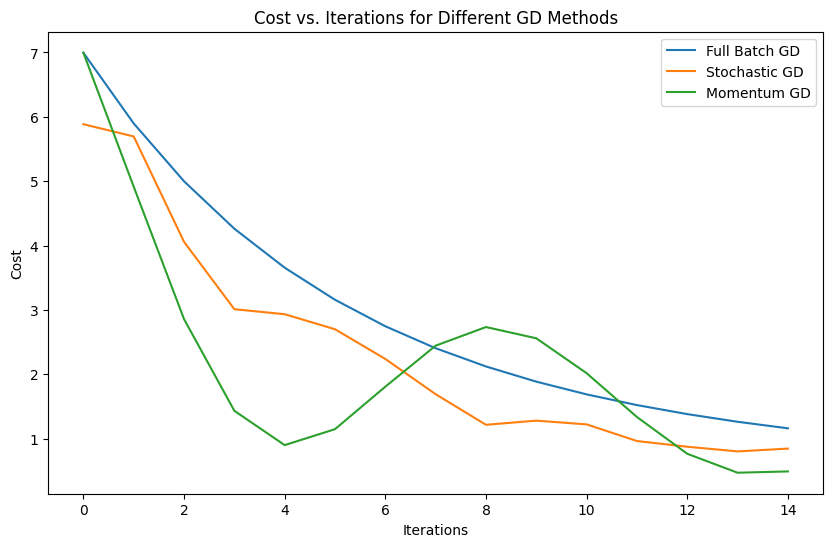

In [37]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Add bias term to x
X = np.column_stack((np.ones_like(x1), x1))

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

def gradient_descent(X, y, learning_rate, num_iterations, batch_size=None, momentum=0):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    theta_history = [theta.copy()]
    velocity = np.zeros_like(theta)
    gradient_history = []
    velocity_history = []

    for i in range(num_iterations):
        if batch_size:
            indices = np.random.choice(m, batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]
        else:
            X_batch = X
            y_batch = y

        gradient = compute_gradient(X_batch, y_batch, theta)
        velocity = momentum * velocity + learning_rate * gradient
        theta -= velocity

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())
        gradient_history.append(gradient.copy())
        velocity_history.append(velocity.copy())

    return theta, cost_history, theta_history, gradient_history, velocity_history

# Run different variants of gradient descent
learning_rate = 0.1
num_iterations = 15
epsilon = 0.001

full_batch_gd, full_batch_cost, full_batch_theta, full_batch_grad, _ = gradient_descent(X, y, learning_rate, num_iterations)
sgd, sgd_cost, sgd_theta, sgd_grad, _ = gradient_descent(X, y, learning_rate, num_iterations, batch_size=1)
momentum_gd, momentum_cost, momentum_theta, momentum_grad, momentum_velocity = gradient_descent(X, y, learning_rate, num_iterations, momentum=0.9)

# Visualization function
def plot_contour(X, y, theta_history, gradient_history, velocity_history, title):
    theta0_range = np.linspace(0, 8, 100)
    theta1_range = np.linspace(-1, 5, 100)
    J_vals = np.zeros((len(theta0_range), len(theta1_range)))

    for i, theta0 in enumerate(theta0_range):
        for j, theta1 in enumerate(theta1_range):
            J_vals[i, j] = compute_cost(X, y, [theta0, theta1])

    theta0_mesh, theta1_mesh = np.meshgrid(theta0_range, theta1_range)

    plt.figure(figsize=(12, 10))
    plt.contour(theta0_mesh, theta1_mesh, J_vals.T, levels=50)
    plt.colorbar(label='Cost')

    theta_history = np.array(theta_history)
    plt.plot(theta_history[:, 0], theta_history[:, 1], 'ro-', linewidth=2, markersize=8)

    for i, (theta, grad, vel) in enumerate(zip(theta_history, gradient_history, velocity_history)):
        if i % 3 == 0 or i == len(theta_history) - 1:
            plt.annotate(f'Step {i}', (theta[0], theta[1]), xytext=(5, 5), textcoords='offset points')
            plt.arrow(theta[0], theta[1], -grad[0], -grad[1], color='g', head_width=0.1, head_length=0.1, label='Gradient' if i == 0 else "")
            plt.arrow(theta[0], theta[1], vel[0], vel[1], color='b', head_width=0.1, head_length=0.1, label='Velocity' if i == 0 else "")

    plt.xlabel('θ₀')
    plt.ylabel('θ₁')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot contours for all methods
plot_contour(X, y, full_batch_theta, full_batch_grad, [np.zeros_like(grad) for grad in full_batch_grad], 'Full Batch Gradient Descent')
plot_contour(X, y, sgd_theta, sgd_grad, [np.zeros_like(grad) for grad in sgd_grad], 'Stochastic Gradient Descent')
plot_contour(X, y, momentum_theta, momentum_grad, momentum_velocity, 'Gradient Descent with Momentum')

# Function to count steps to convergence
def steps_to_convergence(cost_history, epsilon):
    for i, cost in enumerate(cost_history):
        if cost < epsilon:
            return i + 1
    return len(cost_history)

full_batch_steps = steps_to_convergence(full_batch_cost, epsilon)
sgd_steps = steps_to_convergence(sgd_cost, epsilon)
momentum_steps = steps_to_convergence(momentum_cost, epsilon)

print(f"Steps to convergence (ε = {epsilon}):")
print(f"Full Batch GD: {full_batch_steps}")
print(f"Stochastic GD: {sgd_steps}")
print(f"Momentum GD: {momentum_steps}")

# Plot cost vs. iterations for all methods
plt.figure(figsize=(10, 6))
plt.plot(full_batch_cost, label='Full Batch GD')
plt.plot(sgd_cost, label='Stochastic GD')
plt.plot(momentum_cost, label='Momentum GD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations for Different GD Methods')
plt.legend()
plt.show()

### Observations:

1. **Full Batch GD (blue)**:

    - It steadily decreases the cost but at a slower rate compared to the others. Since the gradient is computed over the entire dataset, it is more stable but may require more iterations to converge.
2. **Stochastic GD (orange)**:

    - The cost decreases more rapidly in the beginning, but it fluctuates due to the stochastic nature of the updates. Since SGD uses only a single data point at each iteration, it can exhibit more noise.
3. **Momentum GD (green)**:

    - Momentum-based GD shows a fast drop in the cost at the beginning and converges more quickly compared to both Full Batch GD and SGD. The momentum term smooths the updates and helps the algorithm avoid small oscillations, speeding up convergence.

### Conclusion:

- **Momentum GD** achieves the fastest convergence, as expected, because the momentum helps accelerate learning by incorporating information from previous updates.
- **Full Batch GD** is the most stable but converges more slowly.
- **SGD** has a faster initial drop but its noisy nature slows down convergence in the later iterations.

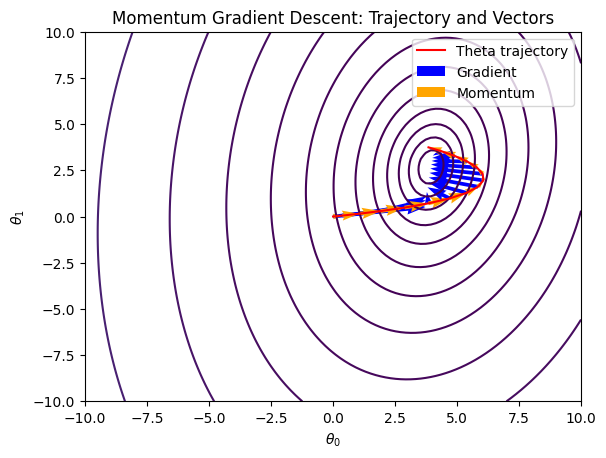

In [38]:
# Prepare contour plot for momentum-based gradient descent
def plot_contours(X, y, theta_history, gradient_history, velocity_history, title):
    # Create a grid of theta values for contour plot
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-10, 10, 100)
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    # Calculate cost function for each pair of theta values
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            theta = np.array([theta0, theta1])
            J_vals[i, j] = compute_cost(X, y, theta)

    theta_history = np.array(theta_history)
    gradient_history = np.array(gradient_history)
    velocity_history = np.array(velocity_history)

    # Plot contour and trajectories
    plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-1, 3, 20), cmap='viridis')
    plt.plot(theta_history[:, 0], theta_history[:, 1], 'r', label='Theta trajectory')

    for i in range(len(gradient_history)):
        theta = theta_history[i]
        gradient = gradient_history[i]
        velocity = velocity_history[i]

        # Plot gradient vector
        plt.quiver(theta[0], theta[1], -gradient[0], -gradient[1], color='blue', angles='xy', scale_units='xy', scale=1, label='Gradient' if i == 0 else '')

        # Plot momentum vector
        plt.quiver(theta[0], theta[1], -velocity[0], -velocity[1], color='orange', angles='xy', scale_units='xy', scale=1, label='Momentum' if i == 0 else '')

    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the contour plots for momentum-based gradient descent
plot_contours(X, y, momentum_theta, momentum_grad, momentum_velocity, title="Momentum Gradient Descent: Trajectory and Vectors")


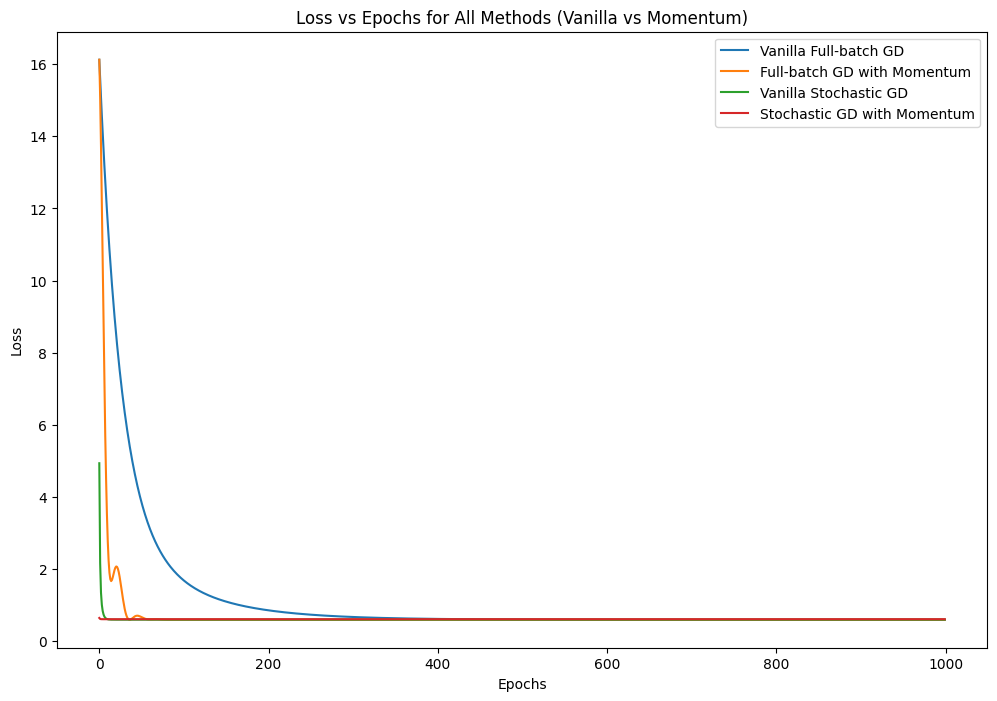

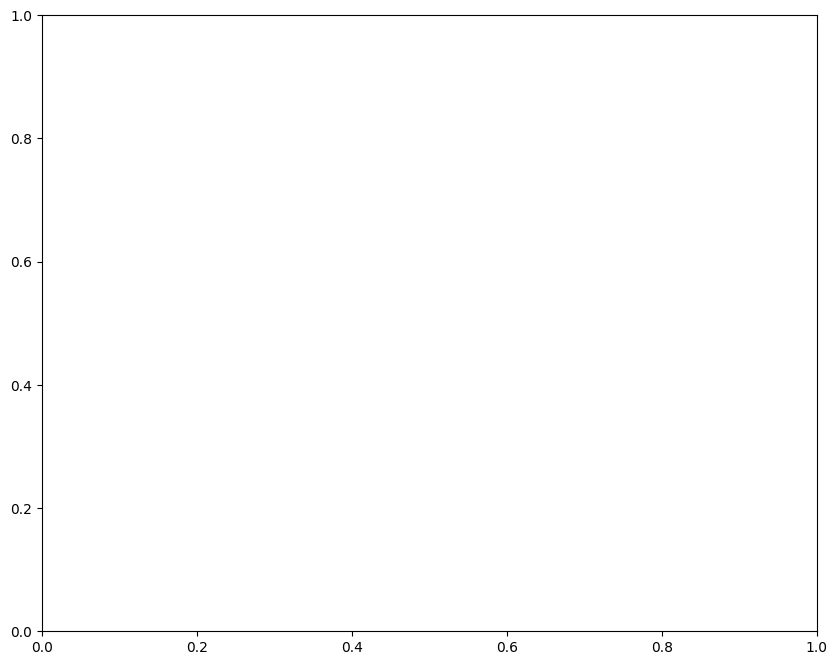

Vanilla Full-batch GD took 1000 steps to converge.
Full-batch GD with Momentum took 1000 steps to converge.
Vanilla Stochastic GD took 1000 steps to converge.
Stochastic GD with Momentum took 1000 steps to converge.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set random seed for reproducibility
np.random.seed(45)

# Generate data
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Add bias term to x
X = np.column_stack((np.ones(num_samples), x1))

# Define the loss function (MSE)
def loss(X, y, w):
    return np.mean((X.dot(w) - y)**2)

# Define the gradient of the loss function
def gradient(X, y, w):
    return 2 * X.T.dot(X.dot(w) - y) / len(y)

# Gradient Descent with Momentum
def gradient_descent_with_momentum(X, y, learning_rate, beta, epochs, epsilon):
    w = np.zeros(X.shape[1])
    velocity = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        grad = gradient(X, y, w)
        velocity = beta * velocity + learning_rate * grad
        w -= velocity

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Implement stochastic gradient descent with momentum
def sgd_with_momentum(X, y, learning_rate, beta, epochs, epsilon):
    w = np.zeros(X.shape[1])
    velocity = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        for i in range(len(y)):
            grad = gradient(X[i:i+1], y[i:i+1], w)
            velocity = beta * velocity + learning_rate * grad
            w -= velocity

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Set hyperparameters
learning_rate = 0.01
epochs = 1000
epsilon = 0.001
beta = 0.9  # Momentum term

# Run the gradient descent with momentum
momentum_w, momentum_losses, momentum_path = gradient_descent_with_momentum(X, y, learning_rate, beta, epochs, epsilon)
sgd_momentum_w, sgd_momentum_losses, sgd_momentum_path = sgd_with_momentum(X, y, learning_rate, beta, epochs, epsilon)

# Run the vanilla gradient descent for comparison
full_batch_w, full_batch_losses, full_batch_path = full_batch_gd(X, y, learning_rate, epochs, epsilon)
sgd_w, sgd_losses, sgd_path = sgd(X, y, learning_rate, epochs, epsilon)

# Plot Loss vs Epochs for all methods
plt.figure(figsize=(12, 8))
plt.plot(full_batch_losses, label='Vanilla Full-batch GD')
plt.plot(momentum_losses, label='Full-batch GD with Momentum')
plt.plot(sgd_losses, label='Vanilla Stochastic GD')
plt.plot(sgd_momentum_losses, label='Stochastic GD with Momentum')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for All Methods (Vanilla vs Momentum)')
plt.legend()
plt.show()

# Create contour plots
w1 = np.linspace(-1, 5, 100)
w2 = np.linspace(-1, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i, j] = loss(X, y, np.array([W1[i, j], W2[i, j]]))

fig, ax = plt.subplots(figsize=(10, 8))

# Function to animate the optimization process
def animate(epoch):
    ax.clear()
    ax.contour(W1, W2, Z, levels=20)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_title(f'Optimization Paths at Epoch {epoch}')

    # Plot paths for Full-batch GD with Momentum and Stochastic GD with Momentum
    ax.plot([w[0] for w in momentum_path[:epoch+1]], [w[1] for w in momentum_path[:epoch+1]], 'r-', label='Full-batch GD with Momentum')
    ax.plot([w[0] for w in sgd_momentum_path[:epoch+1]], [w[1] for w in sgd_momentum_path[:epoch+1]], 'g-', label='Stochastic GD with Momentum')

    # Plot paths for Vanilla Full-batch GD and Vanilla Stochastic GD for comparison
    ax.plot([w[0] for w in full_batch_path[:epoch+1]], [w[1] for w in full_batch_path[:epoch+1]], 'b-', label='Vanilla Full-batch GD')
    ax.plot([w[0] for w in sgd_path[:epoch+1]], [w[1] for w in sgd_path[:epoch+1]], 'y-', label='Vanilla Stochastic GD')
    ax.legend()

# Create the animation
anim = FuncAnimation(fig, animate, frames=len(momentum_path), interval=500, repeat=False)
plt.show()

# Average number of steps to converge to an epsilon neighborhood
print(f"Vanilla Full-batch GD took {len(full_batch_losses)} steps to converge.")
print(f"Full-batch GD with Momentum took {len(momentum_losses)} steps to converge.")
print(f"Vanilla Stochastic GD took {len(sgd_losses)} steps to converge.")
print(f"Stochastic GD with Momentum took {len(sgd_momentum_losses)} steps to converge.")


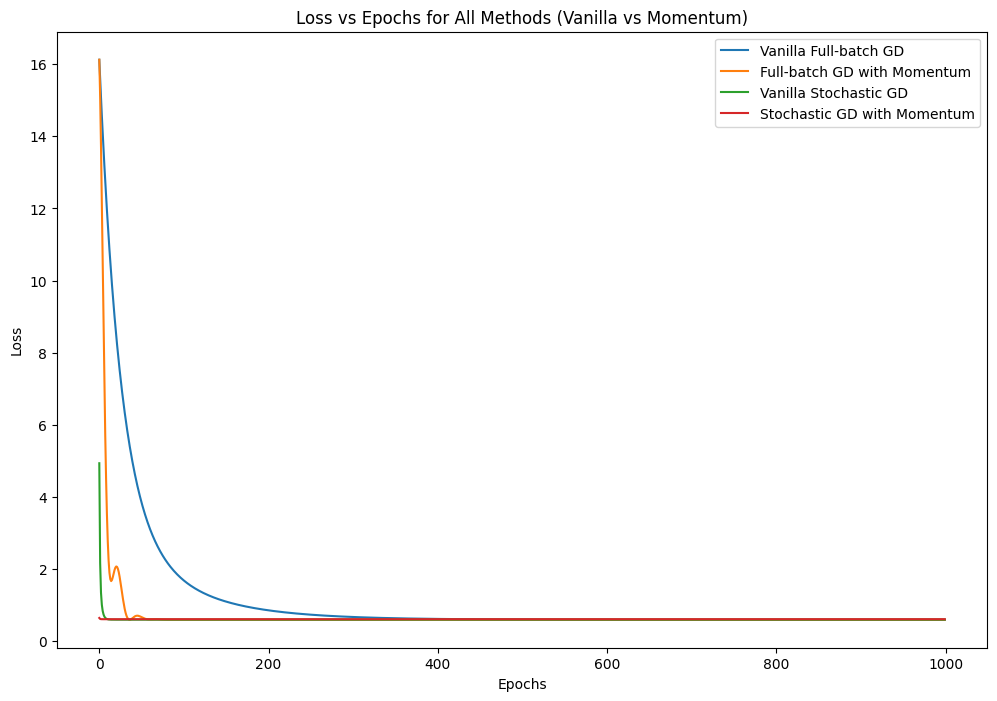

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


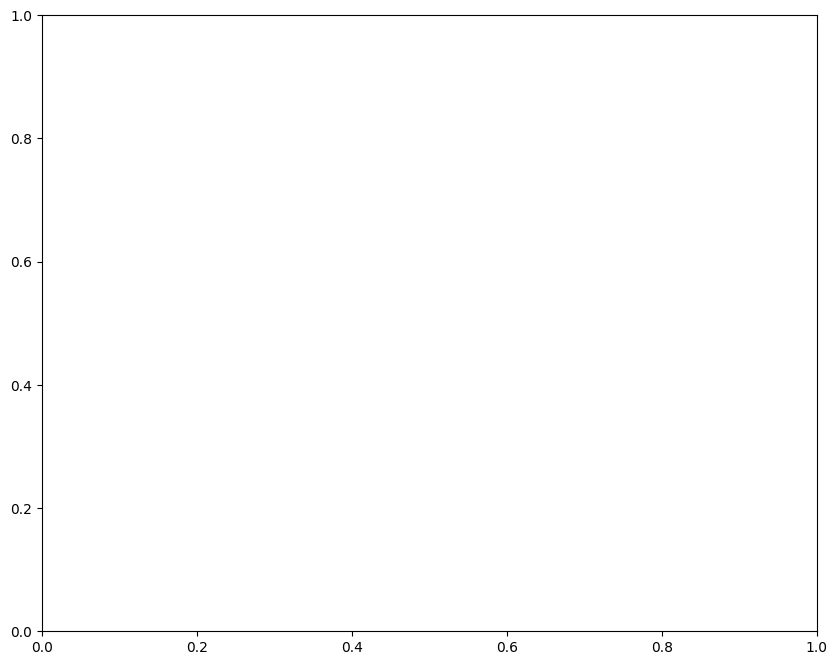

Vanilla Full-batch GD took 1000 steps to converge.
Full-batch GD with Momentum took 1000 steps to converge.
Vanilla Stochastic GD took 1000 steps to converge.
Stochastic GD with Momentum took 1000 steps to converge.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set random seed for reproducibility
np.random.seed(45)

# Generate data
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Add bias term to x
X = np.column_stack((np.ones(num_samples), x1))

# Define the loss function (MSE)
def loss(X, y, w):
    return np.mean((X.dot(w) - y)**2)

# Define the gradient of the loss function
def gradient(X, y, w):
    return 2 * X.T.dot(X.dot(w) - y) / len(y)

# Gradient Descent with Momentum
def gradient_descent_with_momentum(X, y, learning_rate, beta, epochs, epsilon):
    w = np.zeros(X.shape[1])
    velocity = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        grad = gradient(X, y, w)
        velocity = beta * velocity + learning_rate * grad
        w -= velocity

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Stochastic Gradient Descent with Momentum
def sgd_with_momentum(X, y, learning_rate, beta, epochs, epsilon):
    w = np.zeros(X.shape[1])
    velocity = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        for i in range(len(y)):
            grad = gradient(X[i:i+1], y[i:i+1], w)
            velocity = beta * velocity + learning_rate * grad
            w -= velocity

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Vanilla Gradient Descent (Full-batch)
def full_batch_gd(X, y, learning_rate, epochs, epsilon):
    w = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        grad = gradient(X, y, w)
        w -= learning_rate * grad

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Vanilla Stochastic Gradient Descent
def sgd(X, y, learning_rate, epochs, epsilon):
    w = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        for i in range(len(y)):
            grad = gradient(X[i:i+1], y[i:i+1], w)
            w -= learning_rate * grad

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Set hyperparameters
learning_rate = 0.01
epochs = 1000
epsilon = 0.001
beta = 0.9  # Momentum term

# Run the gradient descent with momentum
momentum_w, momentum_losses, momentum_path = gradient_descent_with_momentum(X, y, learning_rate, beta, epochs, epsilon)
sgd_momentum_w, sgd_momentum_losses, sgd_momentum_path = sgd_with_momentum(X, y, learning_rate, beta, epochs, epsilon)

# Run the vanilla gradient descent for comparison
full_batch_w, full_batch_losses, full_batch_path = full_batch_gd(X, y, learning_rate, epochs, epsilon)
sgd_w, sgd_losses, sgd_path = sgd(X, y, learning_rate, epochs, epsilon)

# Plot Loss vs Epochs for all methods
plt.figure(figsize=(12, 8))
plt.plot(full_batch_losses, label='Vanilla Full-batch GD')
plt.plot(momentum_losses, label='Full-batch GD with Momentum')
plt.plot(sgd_losses, label='Vanilla Stochastic GD')
plt.plot(sgd_momentum_losses, label='Stochastic GD with Momentum')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for All Methods (Vanilla vs Momentum)')
plt.legend()
plt.show()

# Create contour plots
w1 = np.linspace(-1, 5, 100)
w2 = np.linspace(-1, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i, j] = loss(X, y, np.array([W1[i, j], W2[i, j]]))

fig, ax = plt.subplots(figsize=(10, 8))

# Function to animate the optimization process
def animate(epoch):
    ax.clear()
    ax.contour(W1, W2, Z, levels=20)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_title(f'Optimization Paths at Epoch {epoch}')

    # Plot paths for Full-batch GD with Momentum and Stochastic GD with Momentum
    ax.plot([w[0] for w in momentum_path[:epoch+1]], [w[1] for w in momentum_path[:epoch+1]], 'r-', label='Full-batch GD with Momentum')
    ax.plot([w[0] for w in sgd_momentum_path[:epoch+1]], [w[1] for w in sgd_momentum_path[:epoch+1]], 'g-', label='Stochastic GD with Momentum')

    # Plot paths for Vanilla Full-batch GD and Vanilla Stochastic GD for comparison
    ax.plot([w[0] for w in full_batch_path[:epoch+1]], [w[1] for w in full_batch_path[:epoch+1]], 'b-', label='Vanilla Full-batch GD')
    ax.plot([w[0] for w in sgd_path[:epoch+1]], [w[1] for w in sgd_path[:epoch+1]], 'y-', label='Vanilla Stochastic GD')
    ax.legend()

# Create the animation
anim = FuncAnimation(fig, animate, frames=len(momentum_path), interval=500, repeat=False)
plt.show()

# Average number of steps to converge to an epsilon neighborhood
print(f"Vanilla Full-batch GD took {len(full_batch_losses)} steps to converge.")
print(f"Full-batch GD with Momentum took {len(momentum_losses)} steps to converge.")
print(f"Vanilla Stochastic GD took {len(sgd_losses)} steps to converge.")
print(f"Stochastic GD with Momentum took {len(sgd_momentum_losses)} steps to converge.")


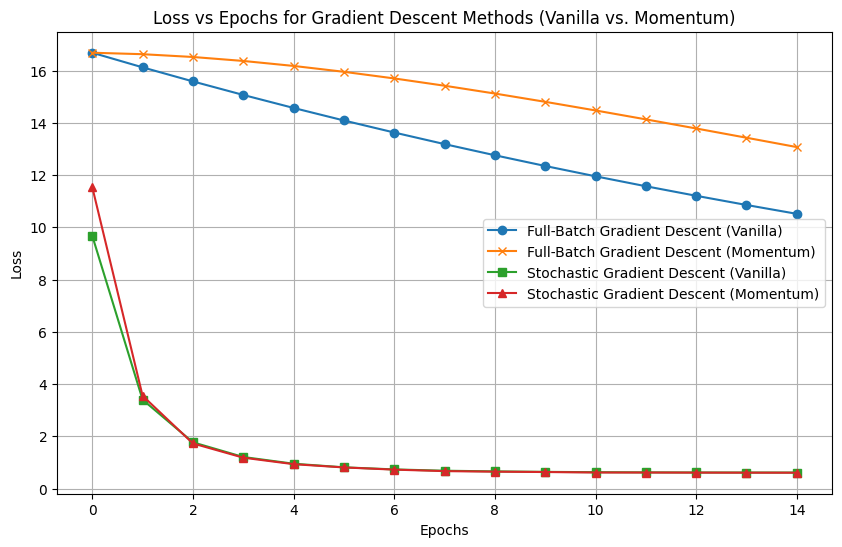

Number of epochs to converge (Full-Batch Vanilla): 15
Number of epochs to converge (Full-Batch Momentum): 15
Number of epochs to converge (SGD Vanilla): 15
Number of epochs to converge (SGD Momentum): 15


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
torch.manual_seed(45)
np.random.seed(45)

# Hyperparameters
learning_rate = 0.01
momentum = 0.9
epsilon = 0.001
num_epochs = 15
mini_batch_size = 10

# Dataset (from previous example)
x = torch.tensor(x1, dtype=torch.float32).reshape(-1, 1)
y_true = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Initialize parameters theta_0 and theta_1
def initialize_params():
    return torch.tensor(0.0, requires_grad=True), torch.tensor(0.0, requires_grad=True)

# Define linear regression model
def linear_model(x, theta_0, theta_1):
    return theta_1 * x + theta_0

# Define mean squared error loss function
def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

# Perform an update with momentum
def update_params_with_momentum(theta_0, theta_1, v_0, v_1, lr, momentum):
    with torch.no_grad():
        v_0 = momentum * v_0 + (1 - momentum) * theta_0.grad
        v_1 = momentum * v_1 + (1 - momentum) * theta_1.grad

        theta_0 -= lr * v_0
        theta_1 -= lr * v_1

    return v_0, v_1

# Full-Batch Gradient Descent with Momentum
def full_batch_gradient_descent_with_momentum(x, y_true, lr, num_epochs, epsilon, momentum):
    theta_0, theta_1 = initialize_params()
    v_0, v_1 = 0.0, 0.0  # Initialize velocity for momentum
    losses = []

    for epoch in range(num_epochs):
        # Predict and compute loss
        y_pred = linear_model(x, theta_0, theta_1)
        loss = mse_loss(y_pred, y_true)
        losses.append(loss.item())

        # Compute gradients
        loss.backward()

        # Update parameters using momentum
        v_0, v_1 = update_params_with_momentum(theta_0, theta_1, v_0, v_1, lr, momentum)

        # Zero gradients
        theta_0.grad.zero_()
        theta_1.grad.zero_()

        # Check convergence
        if loss.item() < epsilon:
            break

    return theta_0.item(), theta_1.item(), losses

# Stochastic Gradient Descent with Momentum
def stochastic_gradient_descent_with_momentum(x, y_true, lr, num_epochs, epsilon, momentum):
    theta_0, theta_1 = initialize_params()
    v_0, v_1 = 0.0, 0.0  # Initialize velocity for momentum
    losses = []

    for epoch in range(num_epochs):
        perm = torch.randperm(len(x))
        epoch_loss = 0
        for i in range(len(x)):
            index = perm[i]
            x_i, y_i = x[index], y_true[index]

            # Predict and compute loss
            y_pred = linear_model(x_i, theta_0, theta_1)
            loss = mse_loss(y_pred, y_i)
            epoch_loss += loss.item()

            # Compute gradients
            loss.backward()

            # Update parameters using momentum
            v_0, v_1 = update_params_with_momentum(theta_0, theta_1, v_0, v_1, lr, momentum)

            # Zero gradients
            theta_0.grad.zero_()
            theta_1.grad.zero_()

        # Append average loss for the epoch
        losses.append(epoch_loss / len(x))

        # Check convergence
        if epoch_loss / len(x) < epsilon:
            break

    return theta_0.item(), theta_1.item(), losses

# Run Gradient Descent with Momentum for full-batch and stochastic
theta_0_fb_mom, theta_1_fb_mom, losses_fb_mom = full_batch_gradient_descent_with_momentum(x, y_true, learning_rate, num_epochs, epsilon, momentum)
theta_0_sgd_mom, theta_1_sgd_mom, losses_sgd_mom = stochastic_gradient_descent_with_momentum(x, y_true, learning_rate, num_epochs, epsilon, momentum)

# Plot Loss vs Epochs for both vanilla and momentum gradient descent
plt.figure(figsize=(10, 6))

# Full-batch Gradient Descent with and without Momentum
plt.plot(losses_fb, label='Full-Batch Gradient Descent (Vanilla)', marker='o')
plt.plot(losses_fb_mom, label='Full-Batch Gradient Descent (Momentum)', marker='x')

# Stochastic Gradient Descent with and without Momentum
plt.plot(losses_sgd, label='Stochastic Gradient Descent (Vanilla)', marker='s')
plt.plot(losses_sgd_mom, label='Stochastic Gradient Descent (Momentum)', marker='^')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Gradient Descent Methods (Vanilla vs. Momentum)')
plt.legend()
plt.grid(True)
plt.show()

# Comparing the number of epochs to converge
print(f"Number of epochs to converge (Full-Batch Vanilla): {len(losses_fb)}")
print(f"Number of epochs to converge (Full-Batch Momentum): {len(losses_fb_mom)}")
print(f"Number of epochs to converge (SGD Vanilla): {len(losses_sgd)}")
print(f"Number of epochs to converge (SGD Momentum): {len(losses_sgd_mom)}")

# Visualization of the momentum vectors, gradient vectors, etc., would require contour plots.
# This is an optional step and can be done similarly using matplotlib's contour plot functions.


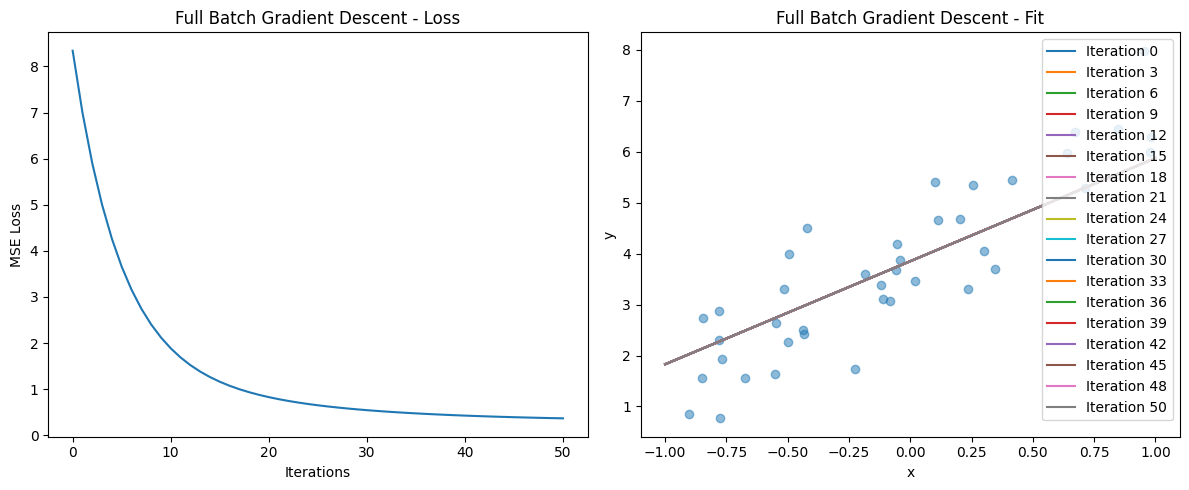

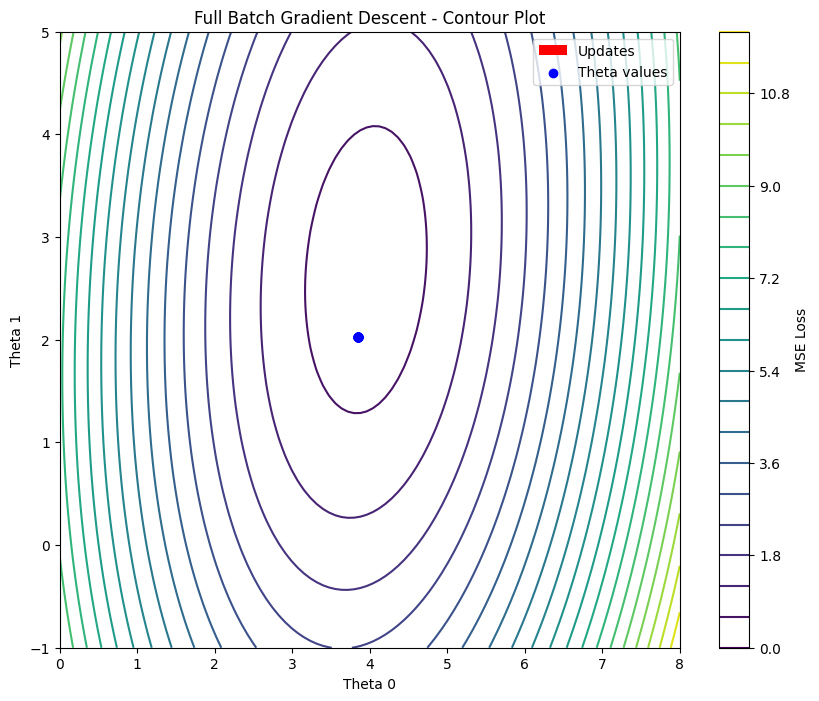

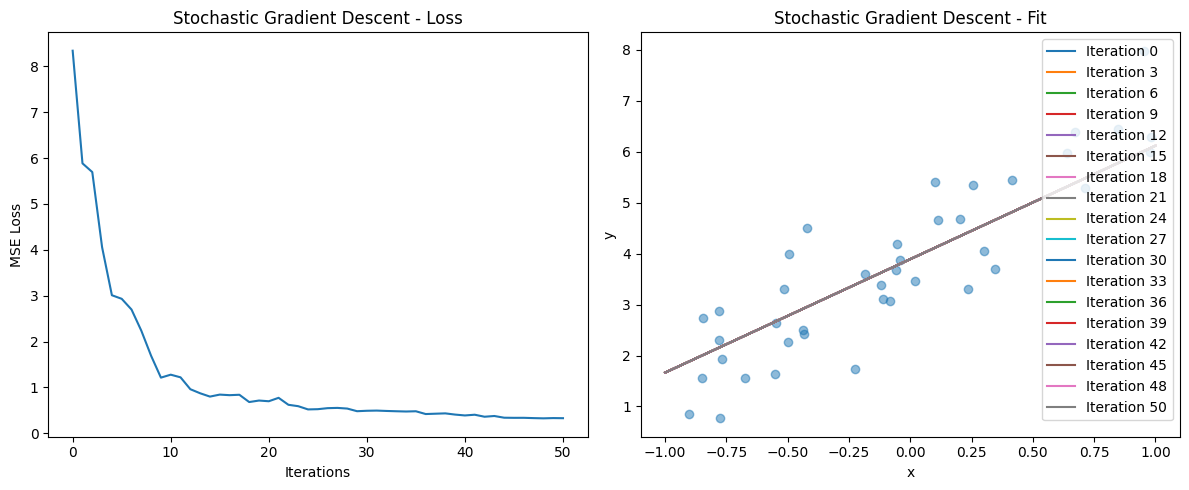

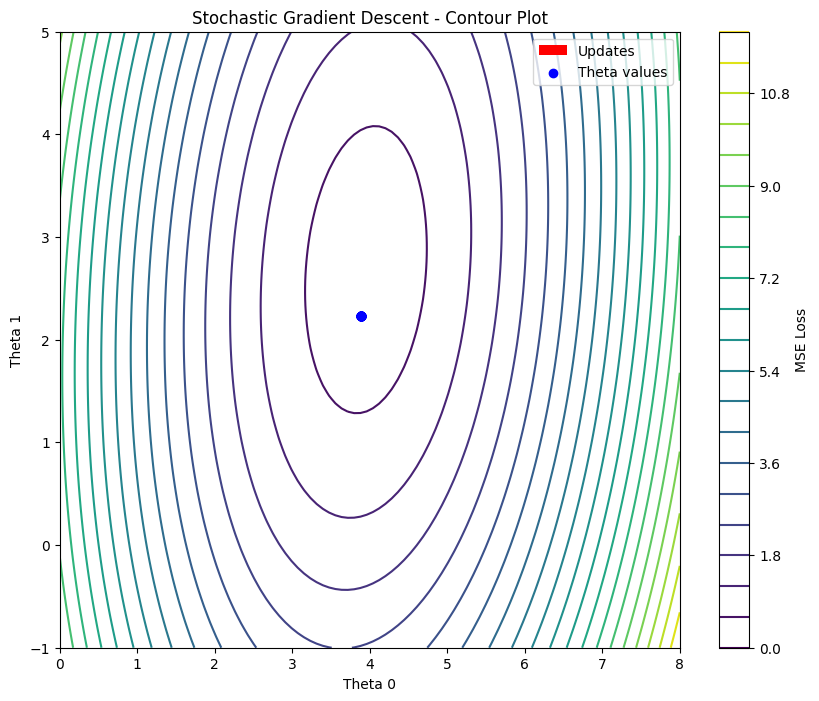

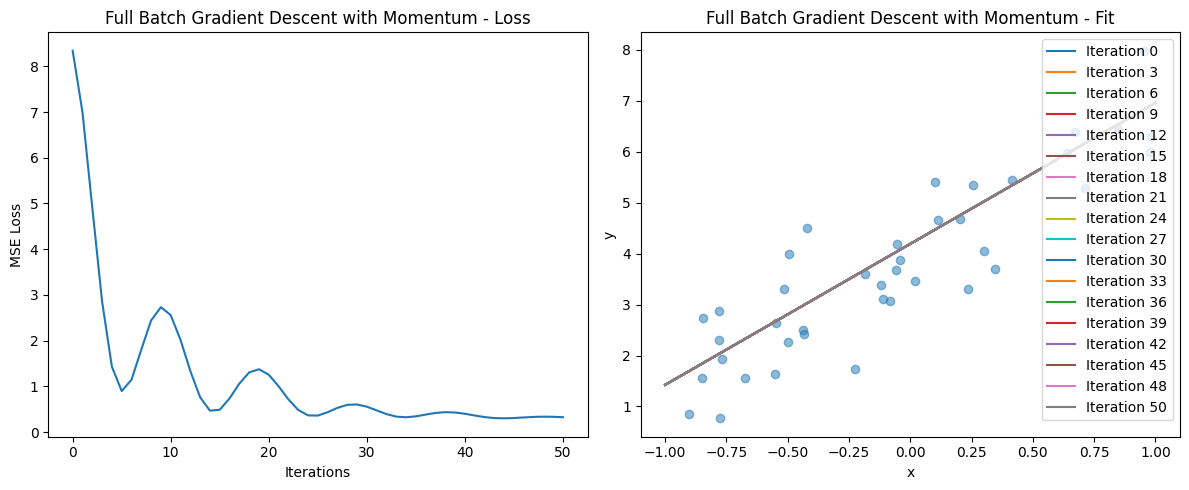

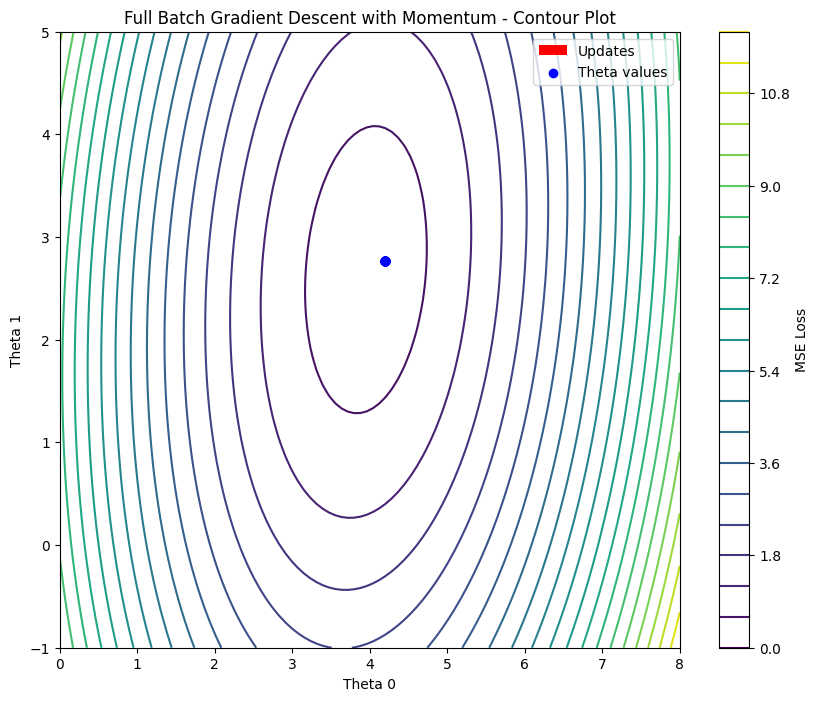

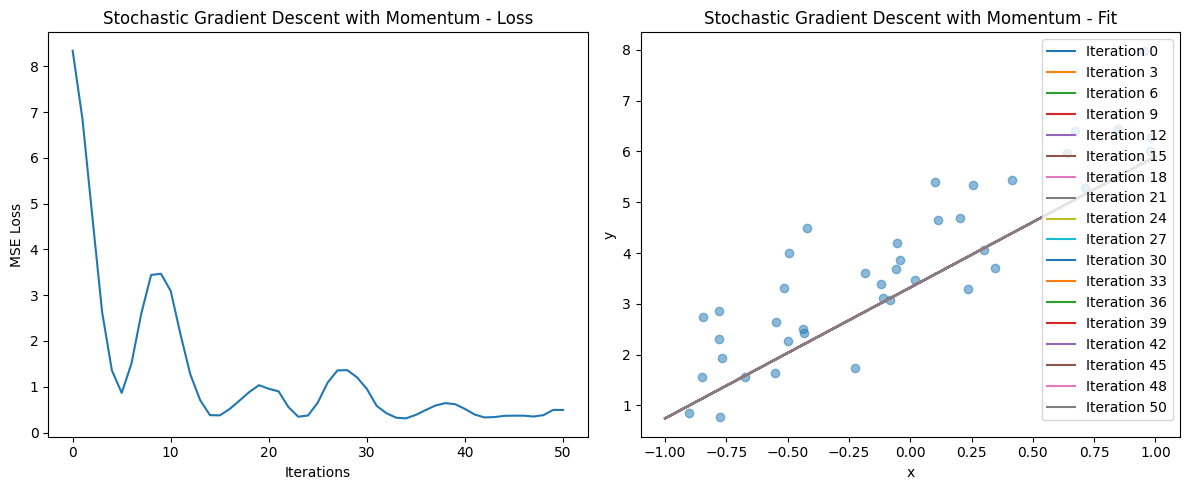

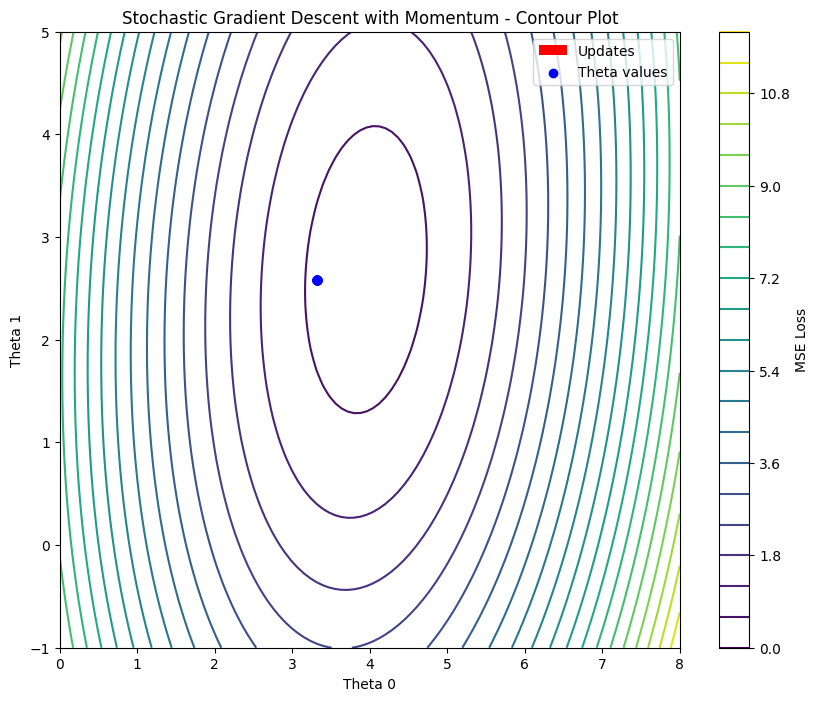

Steps to converge (ε=0.001):
Full Batch GD: 51
Stochastic GD: 51
Full Batch GD with Momentum: 51
Stochastic GD with Momentum: 51


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

# Set random seed and generate data
np.random.seed(45)
num_samples = 40

x1 = np.random.uniform(-1, 1, num_samples)
X = np.column_stack((np.ones(num_samples), x1))
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

def mse_loss(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
    return np.mean((X @ theta - y) ** 2) / 2

def mse_gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    return X.T @ (X @ theta - y) / X.shape[0]

def gradient_descent(X: np.ndarray, y: np.ndarray, learning_rate: float, num_iterations: int,
                     batch_size: int = None, momentum: float = 0) -> Tuple[List[np.ndarray], List[float]]:
    theta = np.zeros(X.shape[1])
    thetas = [theta]
    losses = [mse_loss(X, y, theta)]
    velocity = np.zeros_like(theta)

    for _ in range(num_iterations):
        if batch_size:
            indices = np.random.choice(X.shape[0], batch_size, replace=False)
            X_batch, y_batch = X[indices], y[indices]
        else:
            X_batch, y_batch = X, y

        gradient = mse_gradient(X_batch, y_batch, theta)
        velocity = momentum * velocity - learning_rate * gradient
        theta += velocity

        thetas.append(theta)
        losses.append(mse_loss(X, y, theta))

    return thetas, losses

def plot_convergence(thetas: List[np.ndarray], losses: List[float], title: str):
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(losses)
    plt.title(f'{title} - Loss')
    plt.xlabel('Iterations')
    plt.ylabel('MSE Loss')

    plt.subplot(122)
    plt.scatter(x1, y, alpha=0.5)
    x_range = np.linspace(-1, 1, 100)
    for i, theta in enumerate(thetas):
        if i % 3 == 0 or i == len(thetas) - 1:
            plt.plot(x_range, theta[0] + theta[1] * x_range, label=f'Iteration {i}')
    plt.legend()
    plt.title(f'{title} - Fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

def plot_contour(thetas: List[np.ndarray], title: str):
    theta0_range = np.linspace(0, 8, 100)
    theta1_range = np.linspace(-1, 5, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)
    Z = np.zeros_like(theta0_grid)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            theta = np.array([theta0_grid[i, j], theta1_grid[i, j]])
            Z[i, j] = mse_loss(X, y, theta)

    plt.figure(figsize=(10, 8))
    plt.contour(theta0_grid, theta1_grid, Z, levels=20)
    plt.colorbar(label='MSE Loss')

    thetas = np.array(thetas)
    plt.quiver(thetas[:-1, 0], thetas[:-1, 1],
               thetas[1:, 0] - thetas[:-1, 0], thetas[1:, 1] - thetas[:-1, 1],
               scale_units='xy', angles='xy', scale=1, color='r', label='Updates')

    plt.scatter(thetas[:, 0], thetas[:, 1], c='b', label='Theta values')
    plt.title(title)
    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')
    plt.legend()
    plt.show()

# Run experiments
learning_rate = 0.1
num_iterations = 50
epsilon = 0.001

# Full batch gradient descent
thetas_full, losses_full = gradient_descent(X, y, learning_rate, num_iterations)
plot_convergence(thetas_full, losses_full, 'Full Batch Gradient Descent')
plot_contour(thetas_full, 'Full Batch Gradient Descent - Contour Plot')

# Stochastic gradient descent
thetas_sgd, losses_sgd = gradient_descent(X, y, learning_rate, num_iterations, batch_size=1)
plot_convergence(thetas_sgd, losses_sgd, 'Stochastic Gradient Descent')
plot_contour(thetas_sgd, 'Stochastic Gradient Descent - Contour Plot')

# Full batch gradient descent with momentum
thetas_momentum, losses_momentum = gradient_descent(X, y, learning_rate, num_iterations, momentum=0.9)
plot_convergence(thetas_momentum, losses_momentum, 'Full Batch Gradient Descent with Momentum')
plot_contour(thetas_momentum, 'Full Batch Gradient Descent with Momentum - Contour Plot')

# Stochastic gradient descent with momentum
thetas_sgd_momentum, losses_sgd_momentum = gradient_descent(X, y, learning_rate, num_iterations, batch_size=1, momentum=0.9)
plot_convergence(thetas_sgd_momentum, losses_sgd_momentum, 'Stochastic Gradient Descent with Momentum')
plot_contour(thetas_sgd_momentum, 'Stochastic Gradient Descent with Momentum - Contour Plot')

# Compare convergence
def steps_to_converge(losses, epsilon):
    return next((i for i, loss in enumerate(losses) if loss < epsilon), len(losses))

print(f"Steps to converge (ε={epsilon}):")
print(f"Full Batch GD: {steps_to_converge(losses_full, epsilon)}")
print(f"Stochastic GD: {steps_to_converge(losses_sgd, epsilon)}")
print(f"Full Batch GD with Momentum: {steps_to_converge(losses_momentum, epsilon)}")
print(f"Stochastic GD with Momentum: {steps_to_converge(losses_sgd_momentum, epsilon)}")

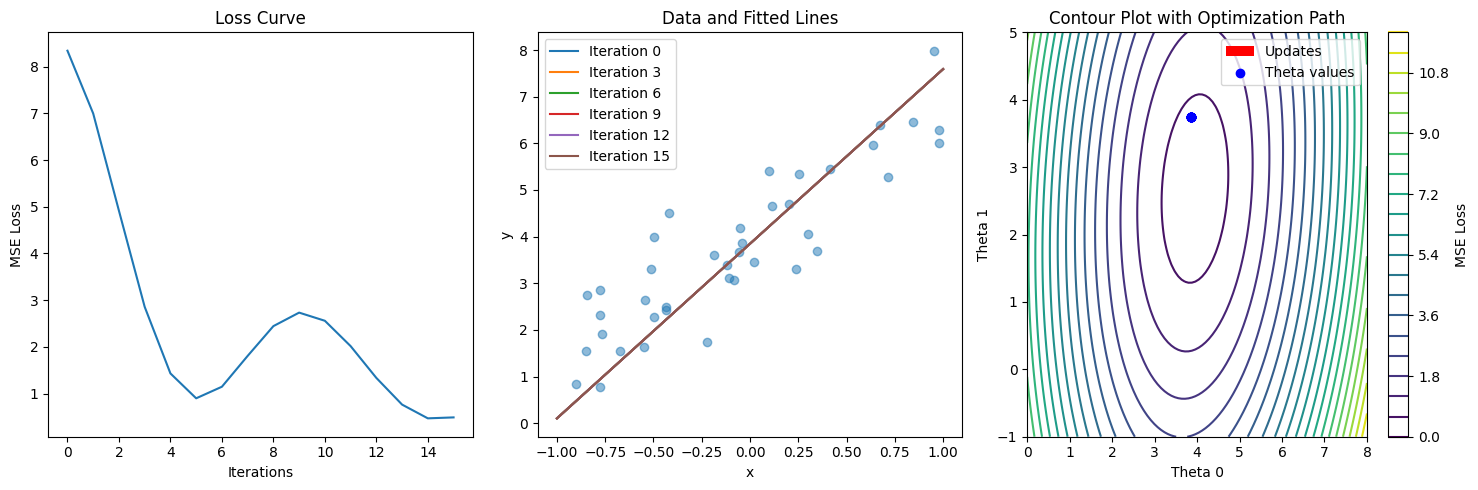

Final theta: [3.84838995 3.74272678]
Final loss: 0.4898254766406563


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed and generate data
np.random.seed(45)
num_samples = 40

x1 = np.random.uniform(-1, 1, num_samples)
X = np.column_stack((np.ones(num_samples), x1))
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

def mse_loss(X, y, theta):
    return np.mean((X @ theta - y) ** 2) / 2

def mse_gradient(X, y, theta):
    return X.T @ (X @ theta - y) / X.shape[0]

def gradient_descent_momentum(X, y, learning_rate, momentum, num_iterations):
    theta = np.zeros(X.shape[1])
    velocity = np.zeros_like(theta)
    thetas = [theta]
    losses = [mse_loss(X, y, theta)]

    for _ in range(num_iterations):
        gradient = mse_gradient(X, y, theta)
        velocity = momentum * velocity - learning_rate * gradient
        theta += velocity

        thetas.append(theta)
        losses.append(mse_loss(X, y, theta))

    return thetas, losses

# Run gradient descent with momentum
learning_rate = 0.1
momentum = 0.9
num_iterations = 15

thetas, losses = gradient_descent_momentum(X, y, learning_rate, momentum, num_iterations)

# Visualize the convergence process
plt.figure(figsize=(15, 5))

# Plot 1: Loss curve
plt.subplot(131)
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')

# Plot 2: Data points and fitted lines
plt.subplot(132)
plt.scatter(x1, y, alpha=0.5)
x_range = np.linspace(-1, 1, 100)
for i, theta in enumerate(thetas):
    if i % 3 == 0 or i == len(thetas) - 1:
        plt.plot(x_range, theta[0] + theta[1] * x_range, label=f'Iteration {i}')
plt.legend()
plt.title('Data and Fitted Lines')
plt.xlabel('x')
plt.ylabel('y')

# Plot 3: Contour plot with optimization path
plt.subplot(133)
theta0_range = np.linspace(0, 8, 100)
theta1_range = np.linspace(-1, 5, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(theta0_grid)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        theta = np.array([theta0_grid[i, j], theta1_grid[i, j]])
        Z[i, j] = mse_loss(X, y, theta)

plt.contour(theta0_grid, theta1_grid, Z, levels=20)
plt.colorbar(label='MSE Loss')

thetas = np.array(thetas)
plt.quiver(thetas[:-1, 0], thetas[:-1, 1],
           thetas[1:, 0] - thetas[:-1, 0], thetas[1:, 1] - thetas[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='r', label='Updates')

plt.scatter(thetas[:, 0], thetas[:, 1], c='b', label='Theta values')
plt.title('Contour Plot with Optimization Path')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.legend()

plt.tight_layout()
plt.show()

print("Final theta:", thetas[-1])
print("Final loss:", losses[-1])

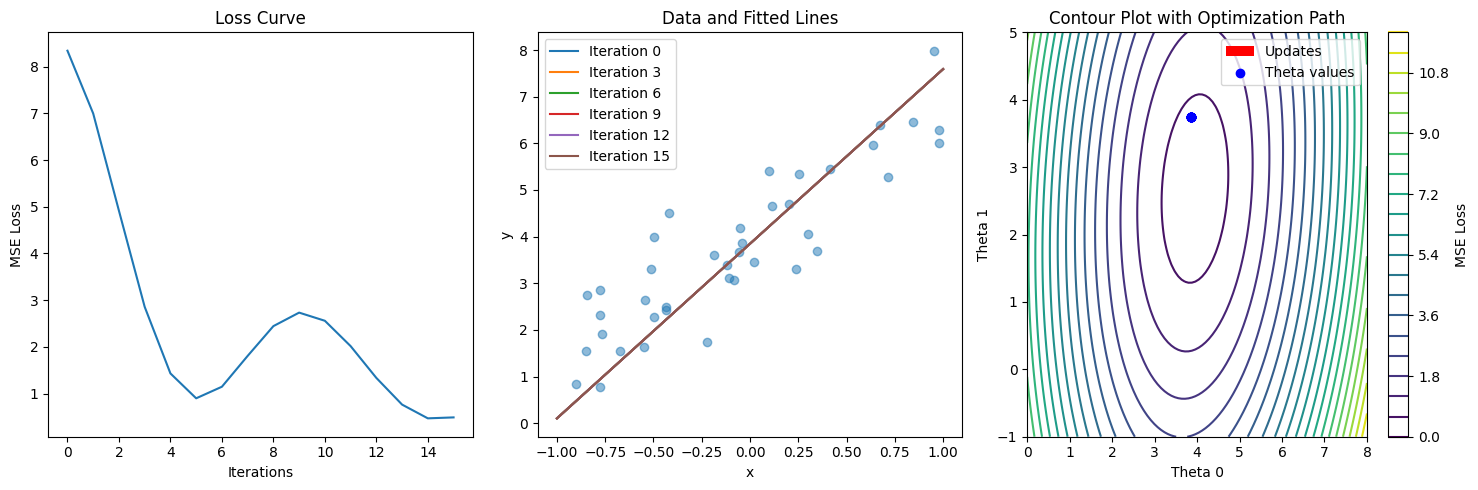

Final theta: [3.84838995 3.74272678]
Final loss: 0.4898254766406563


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed and generate data
np.random.seed(45)
num_samples = 40

x1 = np.random.uniform(-1, 1, num_samples)
X = np.column_stack((np.ones(num_samples), x1))
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# MSE Loss function and gradient
def mse_loss(X, y, theta):
    return np.mean((X @ theta - y) ** 2) / 2

def mse_gradient(X, y, theta):
    return X.T @ (X @ theta - y) / X.shape[0]

# Gradient Descent with Momentum
def gradient_descent_momentum(X, y, learning_rate, momentum, num_iterations):
    theta = np.zeros(X.shape[1])
    velocity = np.zeros_like(theta)
    thetas = [theta]
    losses = [mse_loss(X, y, theta)]

    for _ in range(num_iterations):
        gradient = mse_gradient(X, y, theta)
        velocity = momentum * velocity - learning_rate * gradient
        theta += velocity

        thetas.append(theta)
        losses.append(mse_loss(X, y, theta))

    return thetas, losses

# Run gradient descent with momentum
learning_rate = 0.1
momentum = 0.9
num_iterations = 15

thetas, losses = gradient_descent_momentum(X, y, learning_rate, momentum, num_iterations)

# Visualize the convergence process
plt.figure(figsize=(15, 5))

# Plot 1: Loss curve
plt.subplot(131)
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')

# Plot 2: Data points and fitted lines
plt.subplot(132)
plt.scatter(x1, y, alpha=0.5)
x_range = np.linspace(-1, 1, 100)
for i, theta in enumerate(thetas):
    if i % 3 == 0 or i == len(thetas) - 1:
        plt.plot(x_range, theta[0] + theta[1] * x_range, label=f'Iteration {i}')
plt.legend()
plt.title('Data and Fitted Lines')
plt.xlabel('x')
plt.ylabel('y')

# Plot 3: Contour plot with optimization path
plt.subplot(133)
theta0_range = np.linspace(0, 8, 100)
theta1_range = np.linspace(-1, 5, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(theta0_grid)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        theta = np.array([theta0_grid[i, j], theta1_grid[i, j]])
        Z[i, j] = mse_loss(X, y, theta)

plt.contour(theta0_grid, theta1_grid, Z, levels=20)
plt.colorbar(label='MSE Loss')

thetas = np.array(thetas)
plt.quiver(thetas[:-1, 0], thetas[:-1, 1],
           thetas[1:, 0] - thetas[:-1, 0], thetas[1:, 1] - thetas[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='r', label='Updates')

plt.scatter(thetas[:, 0], thetas[:, 1], c='b', label='Theta values')
plt.title('Contour Plot with Optimization Path')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.legend()

plt.tight_layout()
plt.show()

print("Final theta:", thetas[-1])
print("Final loss:", losses[-1])
